<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Data-Exploratory-Analysis" data-toc-modified-id="Data-Exploratory-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Exploratory Analysis</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span></li></ul></div>

# Import 

In [50]:
import pandas as pd
import numpy as np
from skrebate import ReliefF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Data Exploratory Analysis 

In [53]:
data = pd.read_csv("pancan.csv")

In [3]:
data.head()

,Cancer_Type,X1433EPSILON,X4EBP1,X4EBP1_pS65,X4EBP1_pT37T46,X53BP1,ACC_pS79,ACC1,AKT,AKT_pS473,...,CHK1_pS296,COG3,DUSP4,ERCC5,IGF1R_pY1135Y1136,IRF1,JAK2,P16INK4A,SHP2_pY542,PDL1
0,UCEC,-0.013829,-1.127400,-0.423550,-0.827380,0.021656,2.21700,2.37550,-0.27816,-1.20050,...,0.342840,-0.187920,-0.56235,-0.300170,0.153210,-0.16584,-0.212820,-0.66748,0.065243,-0.211030
1,UCEC,-0.168630,0.165870,-0.505950,0.019504,-0.947890,0.41386,0.50057,-0.63549,0.85884,...,0.216650,-0.086944,-0.23118,0.256720,0.098167,0.23669,0.174500,1.64720,0.063824,0.787150
2,UCEC,0.038842,-0.382370,0.042306,0.119400,0.374310,0.00000,-0.23451,0.33893,0.30467,...,-0.036242,0.059741,-0.37534,0.056021,-0.011055,-0.39934,-0.039017,0.44030,0.292810,0.033804
3,UCEC,0.021308,-0.717660,-0.493150,-0.370670,0.195980,0.32478,0.42861,0.11667,0.56017,...,0.082728,0.074237,-0.36116,-0.257720,0.065891,-0.21994,0.116700,-0.88701,0.159430,0.109700
4,UCEC,0.108640,0.090459,0.339620,-0.017032,0.266380,-1.24100,-1.09810,-1.14560,-0.41474,...,0.202660,-0.108580,0.12052,-0.184920,-0.052694,0.00115,0.483320,-0.75743,-0.359640,-0.070833


In [4]:
data.describe()

,X1433EPSILON,X4EBP1,X4EBP1_pS65,X4EBP1_pT37T46,X53BP1,ACC_pS79,ACC1,AKT,AKT_pS473,AKT_pT308,...,CHK1_pS296,COG3,DUSP4,ERCC5,IGF1R_pY1135Y1136,IRF1,JAK2,P16INK4A,SHP2_pY542,PDL1
count,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,...,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000
mean,0.071311,-0.134386,-0.150230,-0.073403,-0.426273,-0.174060,-0.301188,-0.096093,0.066459,-0.033132,...,-0.015250,-0.116321,-0.111339,-0.106794,0.085933,-0.016991,-0.160675,-0.049698,0.129937,0.094216
std,0.223990,0.521574,0.332136,0.726175,0.644493,0.704146,0.864609,0.470375,0.944341,0.807708,...,0.174280,0.368518,0.642345,0.373222,0.227333,0.290441,0.302975,0.824659,0.565663,0.379125
min,-0.765370,-1.510600,-1.490500,-2.537800,-3.104500,-2.094500,-3.051100,-3.018100,-1.993400,-1.821000,...,-0.716250,-2.267800,-2.592500,-2.016000,-0.608930,-1.462800,-2.849300,-2.262900,-1.901300,-0.988710
25%,-0.067251,-0.478815,-0.374365,-0.556305,-0.816620,-0.651735,-0.808410,-0.330325,-0.607830,-0.608400,...,-0.127630,-0.318130,-0.534320,-0.292680,-0.061127,-0.210625,-0.319800,-0.642095,-0.194170,-0.153390
50%,0.048358,-0.196630,-0.188720,-0.095938,-0.432570,-0.217000,-0.254060,-0.049696,-0.081553,-0.185790,...,-0.015461,-0.111280,-0.200070,-0.062145,0.066569,-0.036014,-0.140320,-0.171950,0.114450,0.056932
75%,0.179515,0.152290,0.019565,0.379525,0.002707,0.249445,0.244305,0.176790,0.600735,0.401370,...,0.086490,0.110040,0.236120,0.132675,0.211465,0.156175,0.025534,0.422520,0.426215,0.298845
max,1.480200,3.312600,2.194100,3.647000,1.778700,3.660300,3.677400,2.335800,3.915700,3.343400,...,1.395700,1.331800,3.155100,2.142300,1.435800,1.977400,1.692600,3.209200,4.811500,3.647200


In [5]:
data.isna().sum()

Cancer_Type       0
X1433EPSILON      0
X4EBP1            0
X4EBP1_pS65       0
X4EBP1_pT37T46    0
                 ..
IRF1              0
JAK2              0
P16INK4A          0
SHP2_pY542        0
PDL1              0
Length: 218, dtype: int64

In [52]:
data.Cancer_Type.unique()

array([ 3,  2,  1,  5, 14, 10,  4,  9, 16, 17, 15,  0, 11,  7,  8, 12, 13,
       18,  6])

In [7]:
data.Cancer_Type.value_counts()

BRCA    815
KIRC    445
OV      411
UCEC    404
THCA    372
COAD    327
STAD    299
LGG     257
LUAD    234
KIRP    208
GBM     205
HNSC    203
LUSC    192
PRAD    164
READ    129
BLCA    127
PAAD    105
ACC      46
SKCM     36
Name: Cancer_Type, dtype: int64

In [8]:
codes = {"Cancer_Type": {"BRCA": 0, "KIRC": 1, "OV": 2, "UCEC": 3, "THCA": 4, "COAD": 5, "STAD": 6, "LGG": 7,
                         "LUAD": 8, "KIRP": 9, "GBM": 10, "HNSC": 11, "LUSC": 12, "PRAD": 13, "READ": 14, "BLCA": 15,
                        "PAAD": 16, "ACC": 17, "SKCM": 18}}

data.replace(codes,inplace=True)

In [47]:
data

,Cancer_Type,X1433EPSILON,X4EBP1,X4EBP1_pS65,X4EBP1_pT37T46,X53BP1,ACC_pS79,ACC1,AKT,AKT_pS473,...,CHK1_pS296,COG3,DUSP4,ERCC5,IGF1R_pY1135Y1136,IRF1,JAK2,P16INK4A,SHP2_pY542,PDL1
0,3,-0.013829,-1.127400,-0.423550,-0.827380,0.021656,2.21700,2.37550,-0.27816,-1.200500,...,0.342840,-0.187920,-0.56235,-0.300170,0.153210,-0.165840,-0.212820,-0.667480,0.065243,-0.211030
1,3,-0.168630,0.165870,-0.505950,0.019504,-0.947890,0.41386,0.50057,-0.63549,0.858840,...,0.216650,-0.086944,-0.23118,0.256720,0.098167,0.236690,0.174500,1.647200,0.063824,0.787150
2,3,0.038842,-0.382370,0.042306,0.119400,0.374310,0.00000,-0.23451,0.33893,0.304670,...,-0.036242,0.059741,-0.37534,0.056021,-0.011055,-0.399340,-0.039017,0.440300,0.292810,0.033804
3,3,0.021308,-0.717660,-0.493150,-0.370670,0.195980,0.32478,0.42861,0.11667,0.560170,...,0.082728,0.074237,-0.36116,-0.257720,0.065891,-0.219940,0.116700,-0.887010,0.159430,0.109700
4,3,0.108640,0.090459,0.339620,-0.017032,0.266380,-1.24100,-1.09810,-1.14560,-0.414740,...,0.202660,-0.108580,0.12052,-0.184920,-0.052694,0.001150,0.483320,-0.757430,-0.359640,-0.070833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,6,0.053097,0.564660,-0.121970,-0.731550,-1.637700,-1.14080,-0.36714,-0.60660,-0.128830,...,0.046355,-1.160600,1.20900,0.083222,0.154670,-0.140700,-0.219150,-0.096767,-1.078600,0.154700
4975,6,0.145970,-0.466360,-0.113260,0.117350,-0.790760,-0.33516,-1.15650,-0.46485,0.187030,...,-0.102920,0.169620,0.24019,0.135690,0.084122,0.466390,0.088363,-0.999860,-0.120650,-0.125440
4976,6,0.179380,-0.688480,1.033100,-0.365250,-1.493100,-0.61577,-1.50670,-0.10751,0.092018,...,0.106490,-0.884160,-0.16657,-0.267450,0.378130,0.453120,-0.121910,-0.641850,-0.626230,0.117800
4977,6,0.098582,-0.194870,-0.095574,0.338590,0.079294,-0.44266,-0.85629,-0.54877,-0.248700,...,0.086891,0.134200,0.25403,-0.084366,0.185820,-0.001975,0.035489,1.665500,0.102660,-0.270460


In [9]:
corr_matrix = data.corr()

In [10]:
corr_matrix['Cancer_Type'].sort_values(ascending=False)

Cancer_Type       1.000000
PKCALPHA          0.362063
CD49B             0.349567
PKCALPHA_pS657    0.335446
SRC_pY416         0.313032
                    ...   
BIM              -0.262279
BCL2             -0.292972
ERALPHA_pS118    -0.298956
GATA3            -0.307402
ERALPHA          -0.509058
Name: Cancer_Type, Length: 218, dtype: float64

<AxesSubplot:>

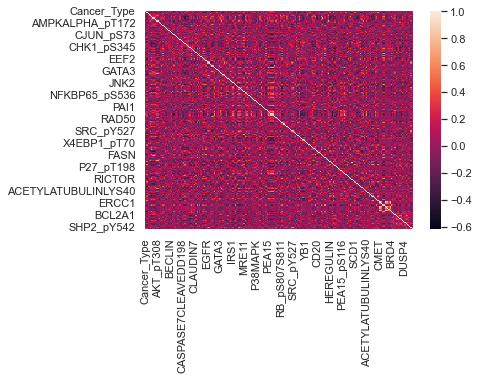

In [13]:
sns.set(style='darkgrid')
sns.heatmap(corr_matrix)

In [14]:
df1=data.drop('Cancer_Type',axis=1)

# Feature Selection

In [15]:
df_norm = (df1 - df1.min()) / (df1.max() - df1.min())
features, labels = df_norm.values, data['Cancer_Type'].values

In [16]:
fs = ReliefF(n_neighbors=18)
fs.fit(features, labels)

ReliefF(n_neighbors=18)

In [18]:
for feature_name, feature_score in zip(df1.columns,fs.feature_importances_):
    print (feature_name, feature_score)
    if feature_score < 0.02:
        df_norm.drop(feature_name, axis=1, inplace=True)

X1433EPSILON 0.02848875527600257
X4EBP1 0.01130665135832894
X4EBP1_pS65 0.010512849446551559
X4EBP1_pT37T46 0.006281377005985118
X53BP1 0.01805575245443724
ACC_pS79 0.02137489918081239
ACC1 0.03070780050361277
AKT 0.014178668566874364
AKT_pS473 0.016165540969310197
AKT_pT308 0.01685412111005252
AMPKALPHA 0.026050522959848037
AMPKALPHA_pT172 0.013067903224461986
AR 0.0891353333927449
ASNS 0.012458265122362356
ATM 0.013308825460222435
BAK 0.03735252061361
BAX 0.012353627177949682
BCL2 0.03803256191949609
BCLXL 0.01987131220044255
BECLIN 0.017852937407302073
BETACATENIN 0.029449667259747295
BID 0.01013641556645598
BIM 0.020605693570493737
CJUN_pS73 0.006609445593925835
CKIT 0.023658261402529024
CMET_pY1235 0.005596317526219912
CMYC 0.0258389452733127
CRAF 0.018164491397606237
CRAF_pS338 0.023367739459168285
CASPASE7CLEAVEDD198 0.015400583872550085
CAVEOLIN1 0.026203958902367833
CD31 0.012921183840653565
CD49B 0.03190161616312149
CDK1 0.017019139507094633
CHK1 0.011944559613208844
CHK1_pS3

In [19]:
df_norm.head()

,X1433EPSILON,ACC_pS79,ACC1,AMPKALPHA,AR,BAK,BCL2,BETACATENIN,BIM,CKIT,...,TUBERIN_pT1462,EPPK1,ACETYLATUBULINLYS40,ACVRL1,ANNEXIN1,PREX1,CD26,DUSP4,IGF1R_pY1135Y1136,P16INK4A
0,0.334677,0.749201,0.806510,0.542811,0.151783,0.330707,0.288792,0.502498,0.397536,0.166252,...,0.108492,0.401900,0.308217,0.239303,0.258557,0.246777,0.576334,0.353217,0.372734,0.291555
1,0.265741,0.435873,0.527855,0.196198,0.103149,0.346660,0.176663,0.501763,0.411182,0.255698,...,0.415561,0.436212,0.226414,0.209923,0.459754,0.326426,0.238745,0.410836,0.345814,0.714552
2,0.358133,0.363957,0.418606,0.287324,0.189849,0.366956,0.468230,0.469660,0.454440,0.133583,...,0.789625,0.410257,0.371296,0.200192,0.257942,0.341981,0.168624,0.385754,0.292398,0.493997
3,0.350324,0.420393,0.517160,0.256728,0.435648,0.325622,0.303529,0.584442,0.320366,0.102068,...,0.417964,0.506652,0.487893,0.186505,0.259002,0.269140,0.196413,0.388221,0.330029,0.251437
4,0.389215,0.148311,0.290258,0.202039,0.222608,0.495960,0.439527,0.650613,0.441765,0.138965,...,0.163803,0.280637,0.526090,0.196718,0.509731,0.166144,0.195501,0.472027,0.272034,0.275117


In [20]:
features = df_norm.values

In [21]:
df_norm_copy = df_norm.copy()

In [22]:
df_norm_copy["Cancer_Type"] = data.Cancer_Type.values

In [23]:
df_norm_copy.head()

,X1433EPSILON,ACC_pS79,ACC1,AMPKALPHA,AR,BAK,BCL2,BETACATENIN,BIM,CKIT,...,EPPK1,ACETYLATUBULINLYS40,ACVRL1,ANNEXIN1,PREX1,CD26,DUSP4,IGF1R_pY1135Y1136,P16INK4A,Cancer_Type
0,0.334677,0.749201,0.806510,0.542811,0.151783,0.330707,0.288792,0.502498,0.397536,0.166252,...,0.401900,0.308217,0.239303,0.258557,0.246777,0.576334,0.353217,0.372734,0.291555,3
1,0.265741,0.435873,0.527855,0.196198,0.103149,0.346660,0.176663,0.501763,0.411182,0.255698,...,0.436212,0.226414,0.209923,0.459754,0.326426,0.238745,0.410836,0.345814,0.714552,3
2,0.358133,0.363957,0.418606,0.287324,0.189849,0.366956,0.468230,0.469660,0.454440,0.133583,...,0.410257,0.371296,0.200192,0.257942,0.341981,0.168624,0.385754,0.292398,0.493997,3
3,0.350324,0.420393,0.517160,0.256728,0.435648,0.325622,0.303529,0.584442,0.320366,0.102068,...,0.506652,0.487893,0.186505,0.259002,0.269140,0.196413,0.388221,0.330029,0.251437,3
4,0.389215,0.148311,0.290258,0.202039,0.222608,0.495960,0.439527,0.650613,0.441765,0.138965,...,0.280637,0.526090,0.196718,0.509731,0.166144,0.195501,0.472027,0.272034,0.275117,3


In [24]:
corr_matrix = df_norm_copy.corr()

<AxesSubplot:>

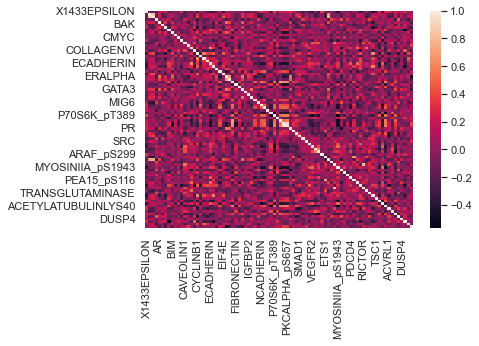

In [25]:
sns.heatmap(corr_matrix)

# Modeling 

In [44]:
y_b = label_binarize(labels, classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
n_classes = y_b.shape[1]

X_train, X_test, y_train, y_test = train_test_split(features,
                                                            y_b,
                                                            test_size = .3,
                                                            shuffle = True,
                                                            stratify = labels,
                                                            random_state = 3)

In [45]:
rf = RandomForestClassifier(bootstrap = True,
                                       max_depth = 50,
                                       max_features = 'auto',
                                       min_samples_leaf = 1,
                                       n_estimators = 2000,
                                       random_state=3)

In [46]:
rf_classifier = OneVsRestClassifier(rf)

y_score = rf_classifier.fit(X_train, y_train).predict_proba(X_test)



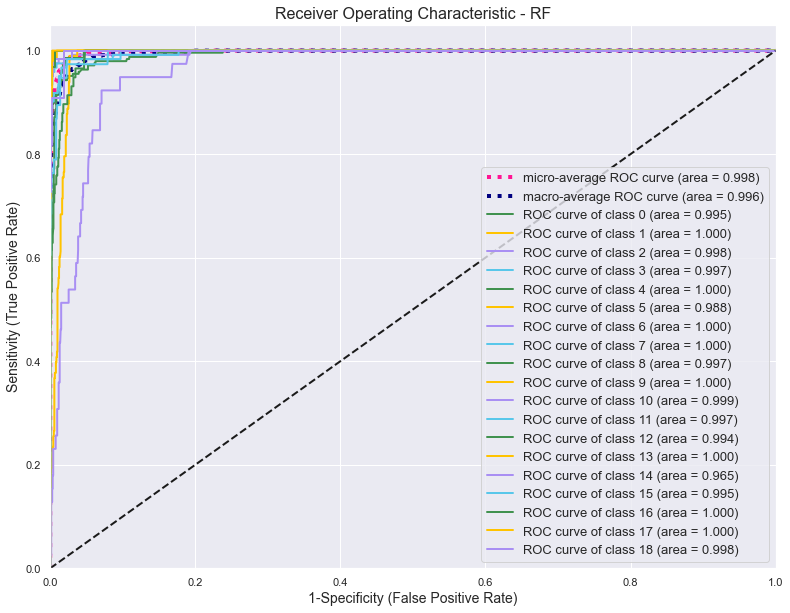

In [51]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Compute micro-average ROC curve and ROC area
fpr['micro'], tpr['micro'], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

#First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

#Finally average it and compute AUC
mean_tpr /= n_classes

fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

#Plot all ROC curves
plt.figure(figsize=(13,10)) 
sns.set_style('darkgrid')
lw=2

plt.plot(fpr['micro'], 
         tpr['micro'], 
         label='micro-average ROC curve (area = {0:0.3f})'''.format(roc_auc['micro']),
         color='deeppink',
         linestyle=':', 
         linewidth=4)

plt.plot(fpr['macro'], 
         tpr['macro'], 
         label='macro-average ROC curve (area = {0:0.3f})'''.format(roc_auc['macro']),
         color='navy', 
         linestyle=':', 
         linewidth=4)

colors = itertools.cycle(['#41924F', '#FFC300', '#a98ff3', '#59C7EA'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], 
             color=color, 
             lw=lw, 
             label='ROC curve of class {0} (area = {1:0.3f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)', fontsize = 14)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize = 14)
plt.title('Receiver Operating Characteristic - RF', fontsize = 16)
plt.legend(loc="lower right", fontsize = 13)
plt.show()

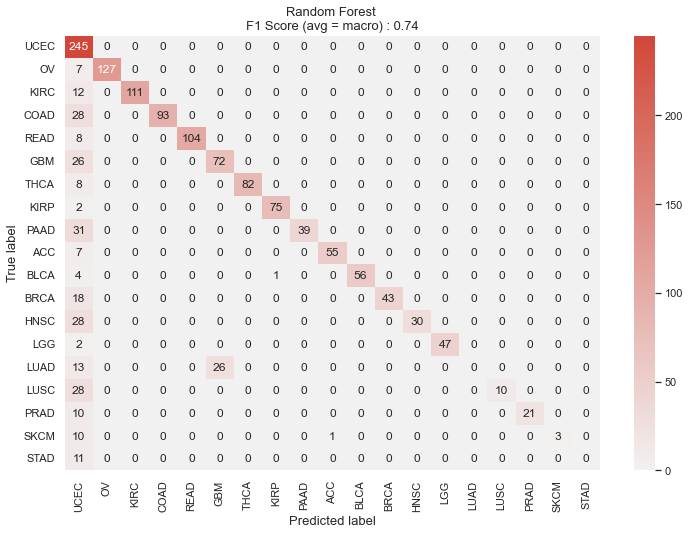

In [65]:
#Confusion Matrix - RF

#Fit the training data
rf.fit(X_train, y_train)

#Predict the testing data
y_pred = rf.predict(X_test)

#Get the confusion matrix and put it into a df
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)) 

cm_df = pd.DataFrame(cm,
                     index = data.Cancer_Type.unique(), 
                     columns = data.Cancer_Type.unique())

#Plot the heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(cm_df, 
            center=0, 
            cmap=sns.diverging_palette(220, 15, as_cmap=True), 
            annot=True, 
            fmt='g')

plt.title('Random Forest \nF1 Score (avg = macro) : {0:.2f}'.format(f1_score(y_test, y_pred, average='macro')), fontsize = 13)
plt.ylabel('True label', fontsize = 13)
plt.xlabel('Predicted label', fontsize = 13)
plt.show()